7.1. Simulate a single predictor and a nonlinear relationship, such as a sin wave shown in Fig. 7.7, and investigate the relationship between the cost, $\epsilon$, and kernel parameters for a support vector machine model:

(a) Fit different models using a radial basis function and different values of
the cost (the C parameter) and . Plot the fitted curve. For example:
```r
> library(kernlab)
> rbfSVM <- ksvm(x = x, y = y, data = sinData,
+ kernel ="rbfdot", kpar = "automatic",
+ C = 1, epsilon = 0.1)
> modelPrediction <- predict(rbfSVM, newdata = dataGrid)
> ## This is a matrix with one column. We can plot the
> ## model predictions by adding points to the previous plot
> points(x = dataGrid$x, y = modelPrediction[,1],
+ type = "l", col = "blue")
> ## Try other parameters

```
(b) The σ parameter can be adjusted using the kpar argument, such as
kpar = list(sigma = 1). Try different values of σ to understand how this
parameter changes the model fit. How do the cost, , and σ values affect
the model?

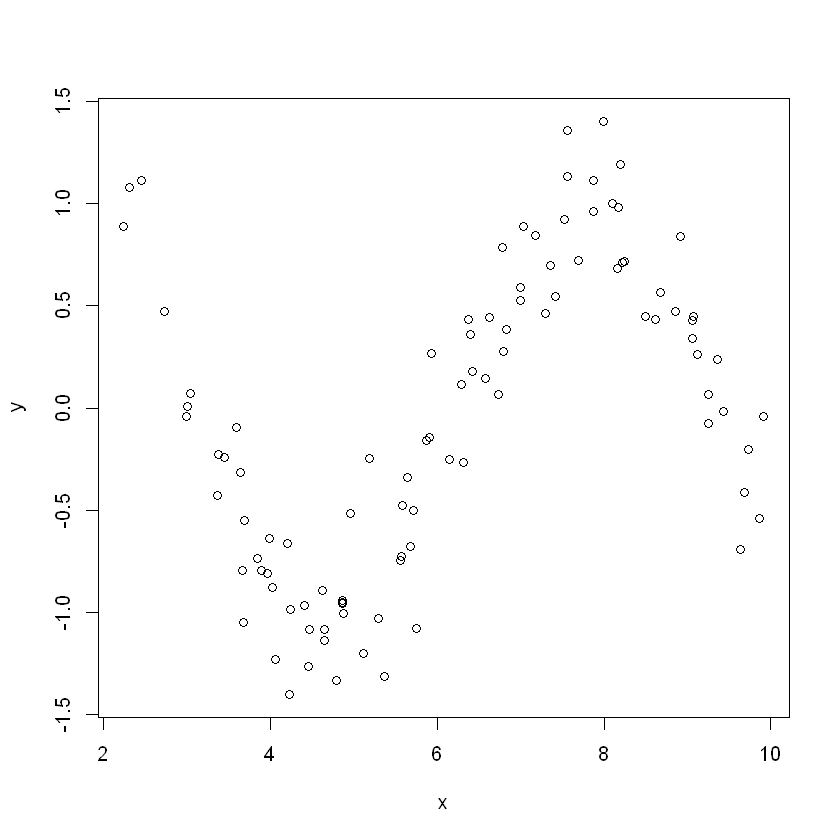

In [1]:
set.seed(100)
x <- runif(100,min=2,max=10)
y <- sin(x) + rnorm(length(x)) *0.25
df_sin <- data.frame(x=x,y=y)
plot(x,y)
df_grid <- data.frame(x=seq(2,10,length=100))

In [2]:
library(kernlab)
library(caret)
fit_rbf <- ksvm(x=x,y=y,data=df_sin,kernel="rbfdot",kpar="automatic",C=1,epsilon=0.1)
pred_rbf <- predict(fit_rbf,newdata = df_grid)

Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:kernlab':

    alpha



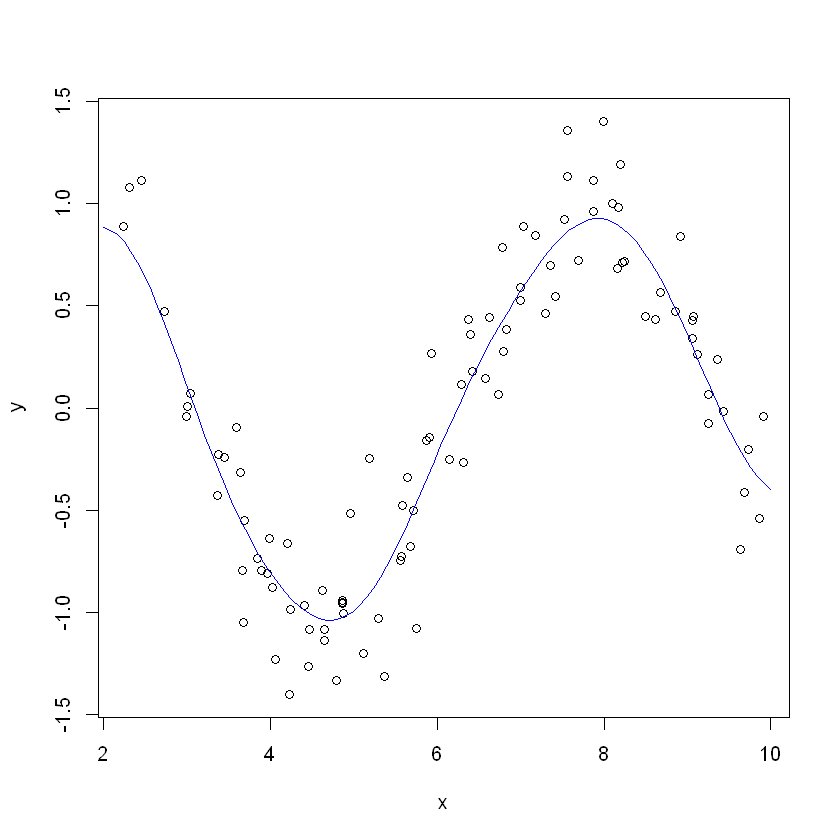

In [3]:
plot(x,y)
points(x=df_grid$x,y=pred_rbf[,1],type="l",col="blue")

In [4]:
parm_1 <- expand.grid(eps=c(.01,.05,.1,.5),
                     costs=2^c(-2,0,2,8))

In [25]:
for (i in 1:nrow(parm_1)){
    set.seed(131)
    fit_rbf <- ksvm(x=x,y=y,data=df_sin,
                   kernel="rbfdot",kpar="automatic",
                   C=parm_1$costs[i],epsilon=parm_1$eps[i])
    tmp <- data.frame(x=df_grid$x,y=predict(fit_rbf,newdata = df_grid),
                    obs=sin(df_grid$x) + rnorm(length(df_grid$x)) *0.25,
                     eps=paste("epsilon:",format(parm_1$eps)[i]),
                     costs=paste("cost",format(parm_1$costs)[i]))
    pred_1 <- if(i==1) tmp else rbind(tmp,pred_1)
}

pred_1$costs <- factor(pred_1$costs,level=rev(levels(pred_1$costs)))

In [26]:
head(pred_1)

x,y,obs,eps,costs
2.000000,1.0062866,1.2763267,epsilon: 0.50,cost 256.00
2.080808,1.0528354,0.3862250,epsilon: 0.50,cost 256.00
2.161616,1.0601565,0.6948763,epsilon: 0.50,cost 256.00
2.242424,1.0231913,1.1583073,epsilon: 0.50,cost 256.00
2.323232,0.9417788,0.6700566,epsilon: 0.50,cost 256.00
2.404040,0.8215830,0.9750236,epsilon: 0.50,cost 256.00


In [ ]:
p2 <- ggplot(data=trn,aes(x=trn$FE,y=fit_linear$finalModel$fitted.values)) + geom_point()  + geom_abline(linetype="dashed",colour = "blue") + 
    scale_y_continuous(limits = c(0,70)) + theme_few() 

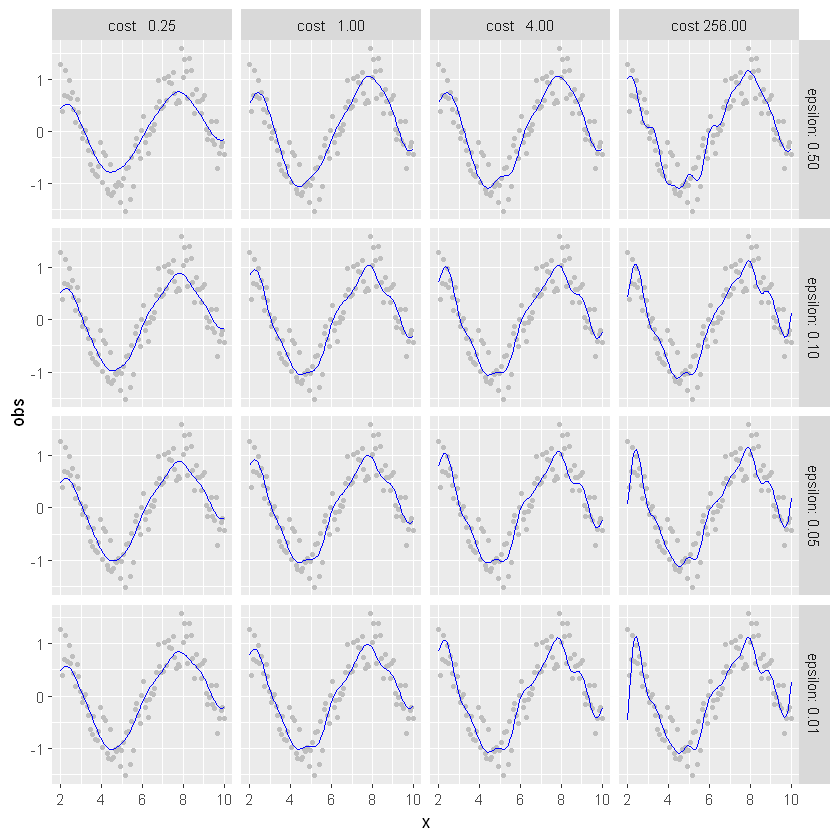

In [49]:
library(ggplot2)
library(ggthemes)

ggplot(pred_1,aes(x,obs)) + 
    geom_point(size=1,colour="grey") + 
    geom_line(aes(x,y),colour="blue") + 
    facet_grid(eps ~ costs) 

In [50]:
#the effect of sigma
set.seed(1016)
parm_2 <- expand.grid(eps=c(0.01,0.05,0.1,0.5),
                     costs=2^c(-2,0,2,8),
                     sigma=as.vector(sigest(y~x,data=df_sin,frac=0.75)))

for (i in 1:nrow(parm_2)){
    fit_rbf <- ksvm(x=x,y=y,data=df_sin,kernel="rbfdot",
                   kpar=list(sigma=parm_2$sigma[i]),
                   C=parm_2$costs[i],
                   epsilon=parm_2$eps[i])
    tmp <- data.frame(x=df_grid$x,
                     y=predict(fit_rbf,newdata = df_grid),
                     eps=paste("epsilon:",format(parm_2$eps)[i]),
                     costs=paste("cost:",parm_2$costs[i]),
                     sigma=paste("sigma:",format(parm_2$sigma,digits=2)[i]))
    pred_2 <- if(i==1) tmp else rbind(tmp,pred_2)
}

pred_2$costs <- factor(pred_2$costs,level=rev(levels(pred_2$costs)))
pred_2$sigma <- factor(pred_2$sigma,level=rev(levels(pred_2$sigma)))

In [51]:
head(pred_2)

x,y,eps,costs,sigma
2.000000,0.2232773,epsilon: 0.50,cost: 256,sigma: 37.15
2.080808,0.3506306,epsilon: 0.50,cost: 256,sigma: 37.15
2.161616,0.4953209,epsilon: 0.50,cost: 256,sigma: 37.15
2.242424,0.6312691,epsilon: 0.50,cost: 256,sigma: 37.15
2.323232,0.7266791,epsilon: 0.50,cost: 256,sigma: 37.15
2.404040,0.7557565,epsilon: 0.50,cost: 256,sigma: 37.15


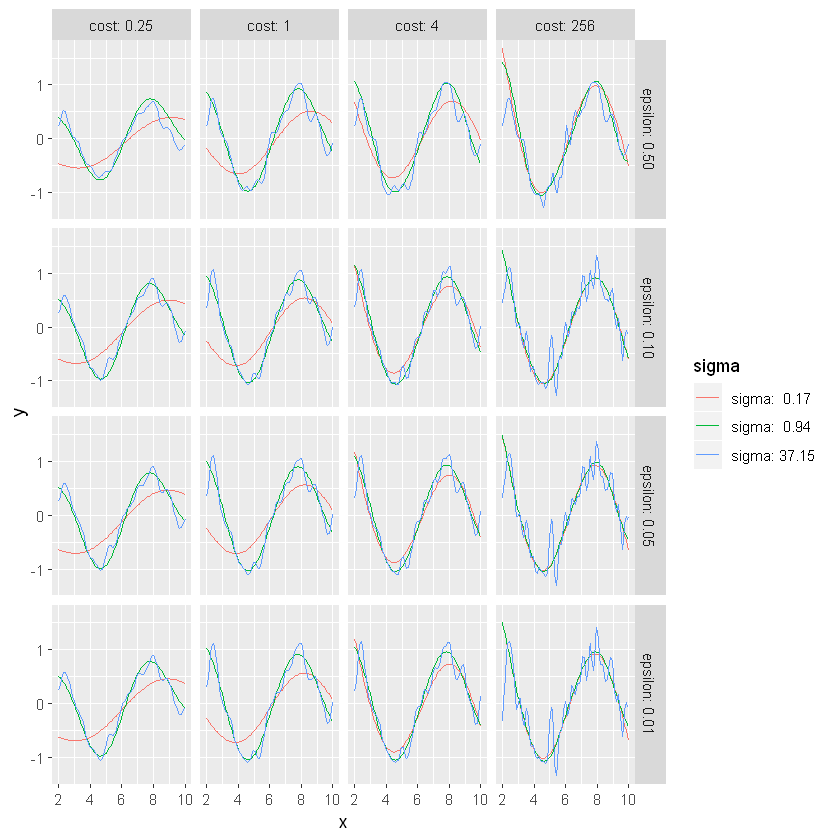

In [52]:
ggplot(pred_2,aes(x,y,colour=sigma)) + 
    geom_line() + 
    facet_grid(eps ~ costs) 

7.2. 

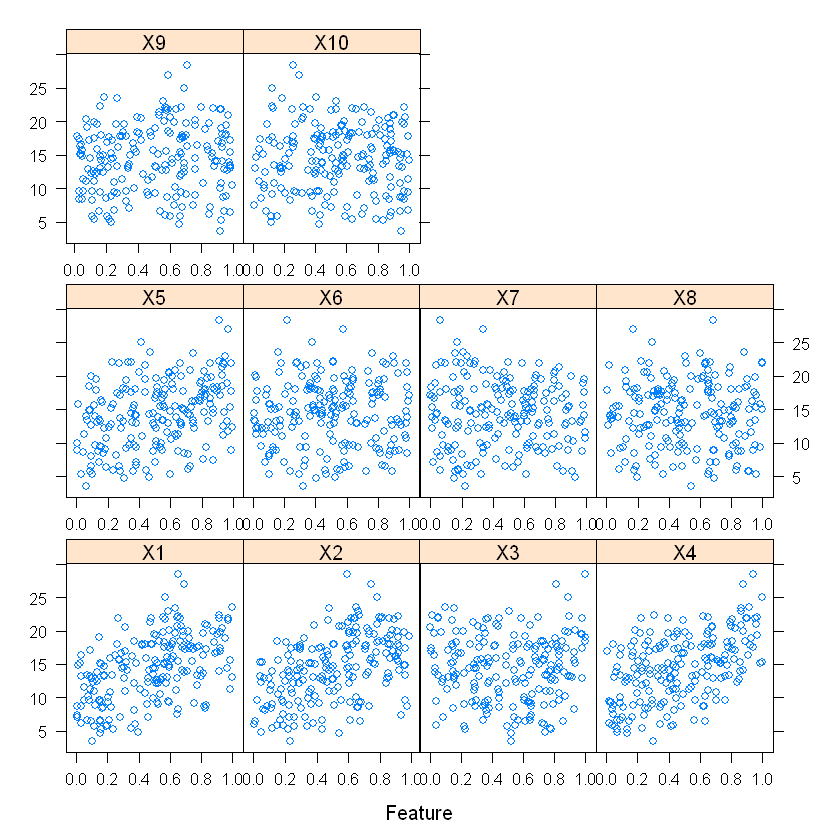

In [2]:
library(mlbench)
set.seed(200)
trn <- mlbench.friedman1(200,sd=1)
trn$x <- data.frame(trn$x)
library(AppliedPredictiveModeling)
featurePlot(trn$x,trn$y)

In [3]:
vld <- mlbench.friedman1(5000,sd=1)
vld$x <- data.frame(vld$x)

In [4]:
library(caret)
fit_knn <- train(x=trn$x,y=trn$y,method = "knn",
                preProc=c("center","scale"),
                tuneLength=10)
fit_knn

k-Nearest Neighbors 

200 samples
 10 predictor

Pre-processing: centered (10), scaled (10) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 200, 200, 200, 200, 200, 200, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE     
   5  3.565620  0.4887976  2.886629
   7  3.422420  0.5300524  2.752964
   9  3.368072  0.5536927  2.715310
  11  3.323010  0.5779056  2.669375
  13  3.275835  0.6030846  2.628663
  15  3.261864  0.6163510  2.621192
  17  3.261973  0.6267032  2.616956
  19  3.286299  0.6281075  2.640585
  21  3.280950  0.6390386  2.643807
  23  3.292397  0.6440392  2.656080

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 15.

In [5]:
fit_knn$results

k,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
5,3.565620,0.4887976,2.886629,0.2589081,0.06486891,0.2430732
7,3.422420,0.5300524,2.752964,0.2474802,0.06629753,0.2212725
9,3.368072,0.5536927,2.715310,0.2381725,0.05680786,0.2011639
11,3.323010,0.5779056,2.669375,0.2274817,0.05763860,0.1849595
13,3.275835,0.6030846,2.628663,0.2205424,0.06020472,0.1899381
15,3.261864,0.6163510,2.621192,0.2400900,0.06185753,0.1998645
17,3.261973,0.6267032,2.616956,0.2523794,0.06762468,0.2070300
19,3.286299,0.6281075,2.640585,0.2591439,0.07080109,0.2183989
21,3.280950,0.6390386,2.643807,0.2715253,0.06497877,0.2116035
23,3.292397,0.6440392,2.656080,0.2645876,0.06466025,0.1997039


In [6]:
pred_knn <- predict(fit_knn,newdata = vld$x)
## The function 'postResample' can be used to get the test set
## perforamnce values
postResample(pred = pred_knn, obs = vld$y)

## The function 'postResample' can be used to get the test set
## perforamnce value

RMSE  Rsquared       MAE 
3.1750657 0.6785946 2.5443169

In [10]:
library(earth)
grid_mars <- expand.grid(degree=1:2,nprune=seq(2,14,by=2))
set.seed(921)
fit_mars <- train(x=trn$x,y=trn$y,method = "earth",
                 preProc=c("center","scale"),
                 tuneGrid=grid_mars)

In [13]:
fit_mars$results

,degree,nprune,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
1,1,2,4.475915,0.2101179,3.681072,0.2116056,0.05088570,0.1807336
8,2,2,4.476602,0.2084188,3.677814,0.2124822,0.05529474,0.1814652
2,1,4,2.809589,0.6924049,2.215497,0.1780137,0.04001454,0.1453763
9,2,4,2.875862,0.6774784,2.274671,0.2945933,0.06105273,0.2540553
3,1,6,2.402136,0.7725211,1.922343,0.2003711,0.03981601,0.2074125
10,2,6,2.446533,0.7637631,1.945124,0.2692381,0.04704921,0.2544086
4,1,8,1.824752,0.8667026,1.418323,0.1726758,0.03203928,0.1507224
11,2,8,1.908074,0.8558195,1.487075,0.2240049,0.03221779,0.1929071
5,1,10,1.774370,0.8735215,1.373649,0.1573823,0.02722583,0.1124003
12,2,10,1.579623,0.8997976,1.259832,0.1947136,0.02673053,0.1453186


In [12]:
pred_mars <- predict(fit_mars,newdata = vld$x)
postResample(pred=pred_mars,obs=vld$y)

RMSE  Rsquared       MAE 
1.2779993 0.9338365 1.0147070

In [19]:
fit_mars$bestTune

,nprune,degree
14,14,2


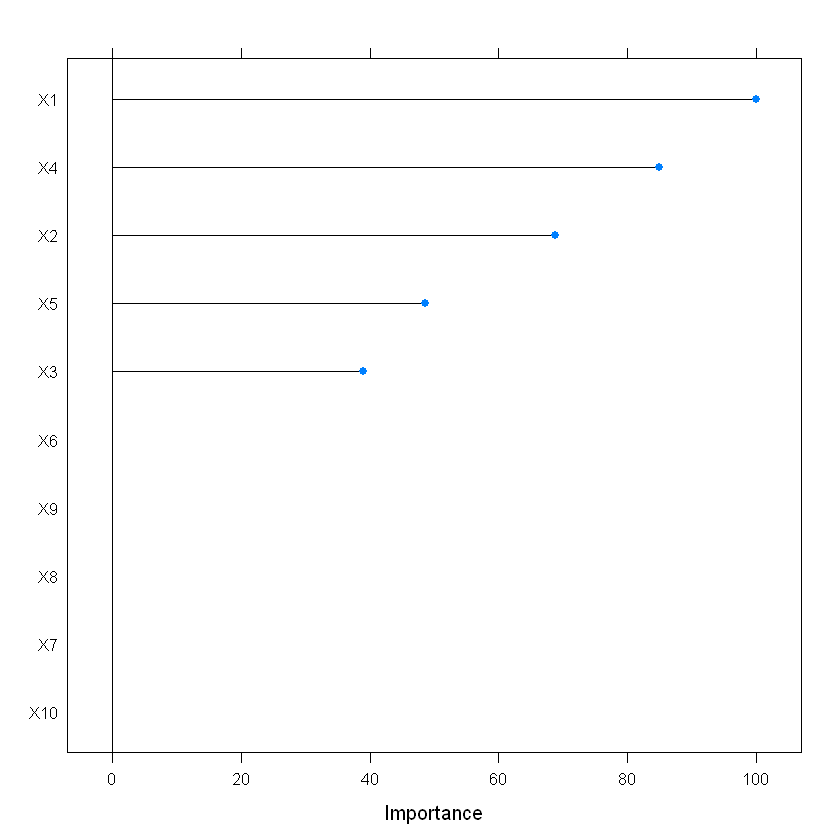

In [18]:
plot(varImp(fit_mars))

In [20]:
library(earth)
fit_mars <- earth(x=trn$x,y=trn$y,nprune = 12,degree = 2)
summary(fit_mars)

Call: earth(x=trn$x, y=trn$y, degree=2, nprune=12)

                                coefficients
(Intercept)                        22.050690
h(0.621722-X1)                    -15.001651
h(X1-0.621722)                     10.878737
h(0.601063-X2)                    -18.830135
h(0.447442-X3)                      9.940077
h(X3-0.606015)                     12.999390
h(0.734892-X4)                     -9.877554
h(X4-0.734892)                     10.414930
h(0.850094-X5)                     -5.604897
h(X1-0.621722) * h(X2-0.295997)   -43.245766
h(0.649253-X1) * h(0.601063-X2)    26.218297

Selected 11 of 18 terms, and 5 of 10 predictors
Termination condition: Reached nk 21
Importance: X1, X4, X2, X5, X3, X6-unused, X7-unused, X8-unused, X9-unused, ...
Number of terms at each degree of interaction: 1 8 2
GCV 1.747495    RSS 264.5358    GRSq 0.929051    RSq 0.9457576

 plotmo grid:    X1        X2       X3        X4        X5        X6        X7
          0.5139349 0.5106664 0.537307 0.4445841 0.5343299 0.4975981 0.4688035
       X8        X9       X10
 0.497961 0.5288716 0.5359218


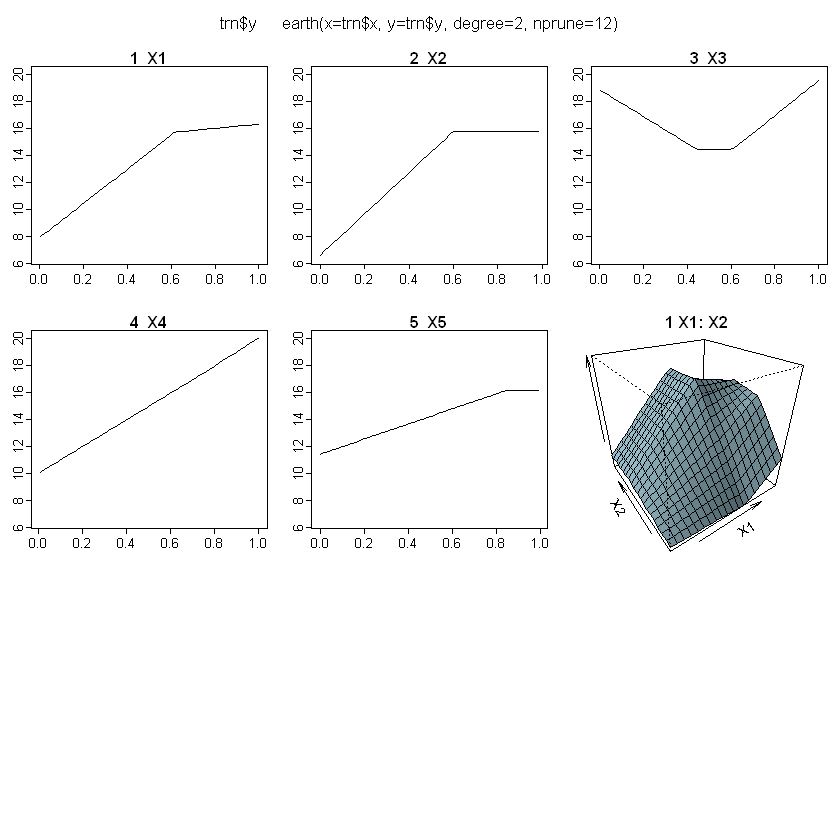

In [23]:
library(plotmo)
plotmo(fit_mars)

In [24]:
set.seed(921)
fit_svm <- train(x=trn$x,y=trn$y,method = "svmRadial",
                preProc=c("center","scale"),
                tuneLength=8)

pred_svm <- predict(fit_svm,newdata=vld$x)
postResample(pred=pred_svm,obs=vld$y)

RMSE  Rsquared       MAE 
2.0856526 0.8237993 1.5848069

7.3.

In [2]:
data(tecator)
set.seed(1029)
absorp <- data.frame(absorp)
trn_id <- createDataPartition(endpoints[,3],p=3/4,list = F)
trnX <- absorp[trn_id,]
vldX <- absorp[-trn_id,]

trnY <- endpoints[trn_id,3]
vldY <- endpoints[-trn_id,3]

In [3]:
# ctrl <- trainControl(method = "repeatedcv",repeats=5)
ctrl <- trainControl(method="cv",number=5)

In [3]:
set.seed(529)
fit_mars <- train(x=trnX,y=trnY,method = "earth",
                 trControl=ctrl,tuneLength=25)
fit_mars

Warning message:
“package ‘earth’ was built under R version 3.4.4”Loading required package: plotmo
Warning message:
“package ‘plotmo’ was built under R version 3.4.4”Loading required package: plotrix
Warning message:
“package ‘plotrix’ was built under R version 3.4.4”Loading required package: TeachingDemos


Multivariate Adaptive Regression Spline 

163 samples
100 predictors

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 131, 131, 131, 129, 130 
Resampling results across tuning parameters:

  nprune  RMSE      Rsquared    MAE      
   2      2.905796  0.06703086  2.4545228
   3      2.611685  0.24366722  2.1580904
   4      2.148161  0.52240153  1.6717195
   5      1.470915  0.73717880  1.1119481
   7      1.379527  0.76861246  1.0309846
   8      1.378323  0.77162891  1.0356326
   9      1.282725  0.80288915  0.9714725
  10      1.256175  0.80951137  0.9652970
  12      1.240854  0.82549325  0.9441629
  13      1.123029  0.85327322  0.8661209
  14      1.110013  0.86055396  0.8722904
  15      1.128123  0.85456783  0.8813127
  17      1.105034  0.85955562  0.8612406
  18      1.099917  0.85563796  0.8437831
  19      1.060989  0.86528421  0.8144149
  20      1.046822  0.86763881  0.8016077
  22      1.045806  0.86730109  0.8001070
  23      1.045806  0.

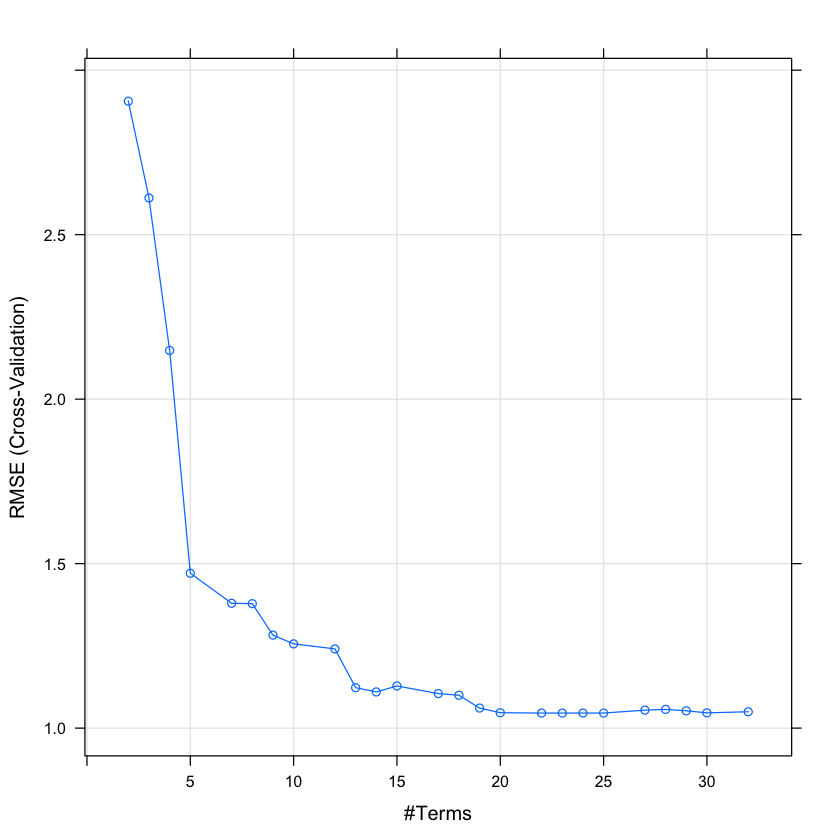

In [4]:
plot(fit_mars)

In [5]:
set.seed(529)
fit_bagmars <- train(x=trnX,y=trnY,method = "bagEarth",
                 trControl=ctrl,tuneLength=25,B=20)

In [6]:
plt <- rbind(fit_mars$results,fit_bagmars$results)
plt$model <- rep(c("Basic","Bagged"),each=nrow(fit_mars$results))

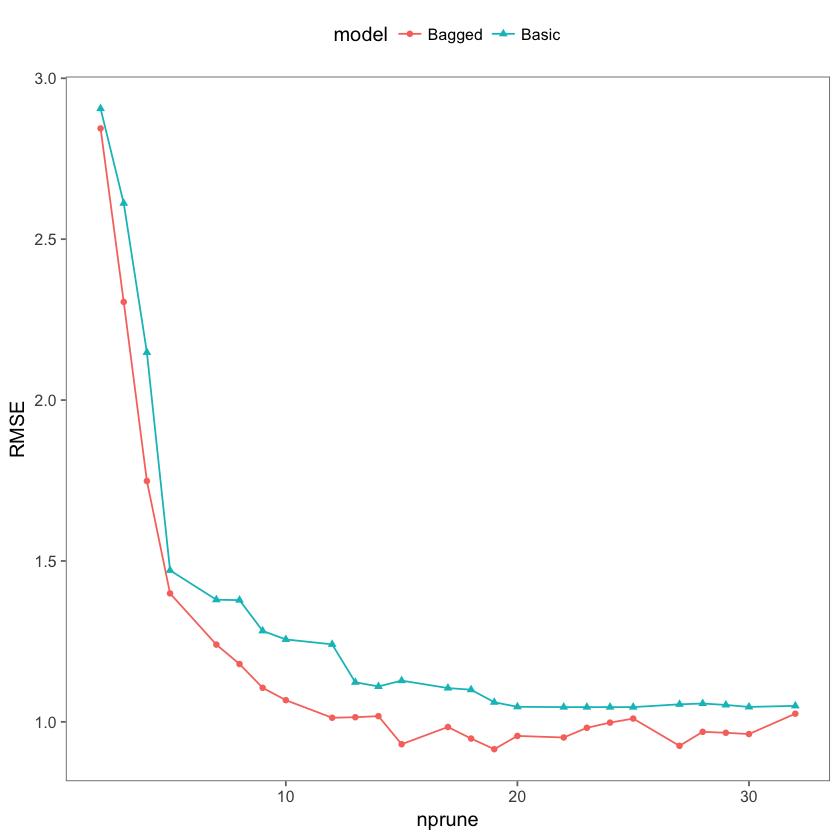

In [12]:
library(ggplot2)
ggplot(plt,aes(nprune,RMSE,colour=model,shape=model)) + 
    geom_point() + geom_line() + theme(legend.position = "top") 

In [5]:
#svm
grid_poly <- expand.grid(degree=1:2,C=2^seq(8,15,length=8),
                        scale=c(0.5,0.1,0.01))
grid_poly <- grid_poly[!(grid_poly$scale==0.5 & grid_poly$degree==2),]

head(grid_poly)

,degree,C,scale
1,1,256,0.5
3,1,512,0.5
5,1,1024,0.5
7,1,2048,0.5
9,1,4096,0.5
11,1,8192,0.5


In [7]:
set.seed(529)
ctrl <- trainControl(method = "cv",number =3)
fit_Qsvm <- train(x=trnX,y=trnY,method="svmPoly",
                  preProc=c("center","scale"),
                  trControl=ctrl,
                  tuneGrid=grid_poly)


Attaching package: ‘kernlab’

The following object is masked from ‘package:ggplot2’:

    alpha



In [8]:
head(fit_Qsvm$results)

,degree,C,scale,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
1,1,256,0.01,1.284490,0.8236885,1.0029316,0.12146309,0.018196341,0.04326429
4,1,512,0.01,1.232175,0.8372238,0.9681576,0.08954603,0.007442347,0.03946557
7,1,1024,0.01,1.219883,0.8398826,0.9583284,0.06873464,0.005540437,0.03242355
10,1,2048,0.01,1.174107,0.8519529,0.9328357,0.05883540,0.009570098,0.03186062
13,1,4096,0.01,1.123431,0.8638707,0.8994232,0.05500827,0.006441866,0.02701630
16,1,8192,0.01,1.053359,0.8793278,0.8443961,0.03107674,0.009014389,0.03074626


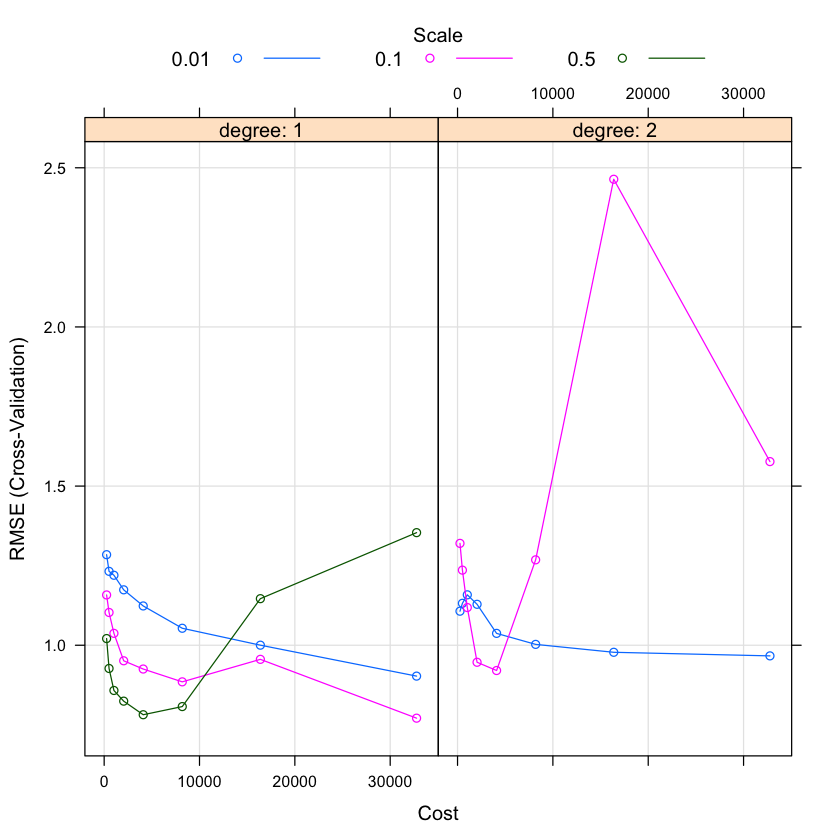

In [13]:
plot(fit_Qsvm)

In [14]:
fit_Rsvm <- train(x=trnX,y=trnY,method="svmRadial",
                preProc=c("center","scale"),trControl=ctrl,tuneLength=10)

In [16]:
#nnet
ctrl <- trainControl(method = "repeatedcv",repeats = 3)
set.seed(529)
fit_net <- train(x = trnX, y = trnY,method = "nnet",
                 trControl = ctrl,preProc = c("center", "scale"),
                 linout = T,trace = F,
                 tuneGrid = expand.grid(size = 1:9,
                                        decay = c(0, .001, .01, .1)))

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

In [17]:
set.seed(529)
fit_PCAnet<- train(x = trnX, y = trnY,
                   method = "nnet",trControl = ctrl,
                   preProc = c("center", "scale", "pca"),
                   linout = T,trace = F,
                   tuneGrid = expand.grid(size = 1:9,decay = c(0, .001, .01, .1)))

In [18]:
plt_net <- rbind(fit_net$results,fit_PCAnet$results)
plt_net$model <- rep(c("raw","pca"),each=nrow(fit_net$results))

head(plt_net)

size,decay,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD,model
1,0.000,2.2475592,0.6788071,1.5423461,3.8159897,0.40207806,1.4937661,raw
1,0.001,0.9598081,0.8656273,0.7874140,0.6324843,0.21414582,0.5526144,raw
1,0.010,0.6653305,0.9535694,0.5393960,0.1300980,0.01899467,0.1015414,raw
1,0.100,0.9472910,0.9066716,0.7441097,0.2161839,0.03177183,0.1596350,raw
2,0.000,0.8366072,0.8900254,0.6715659,0.6703000,0.20773303,0.5663813,raw
2,0.001,0.7256449,0.9188250,0.5832279,0.5129004,0.17250691,0.4215343,raw


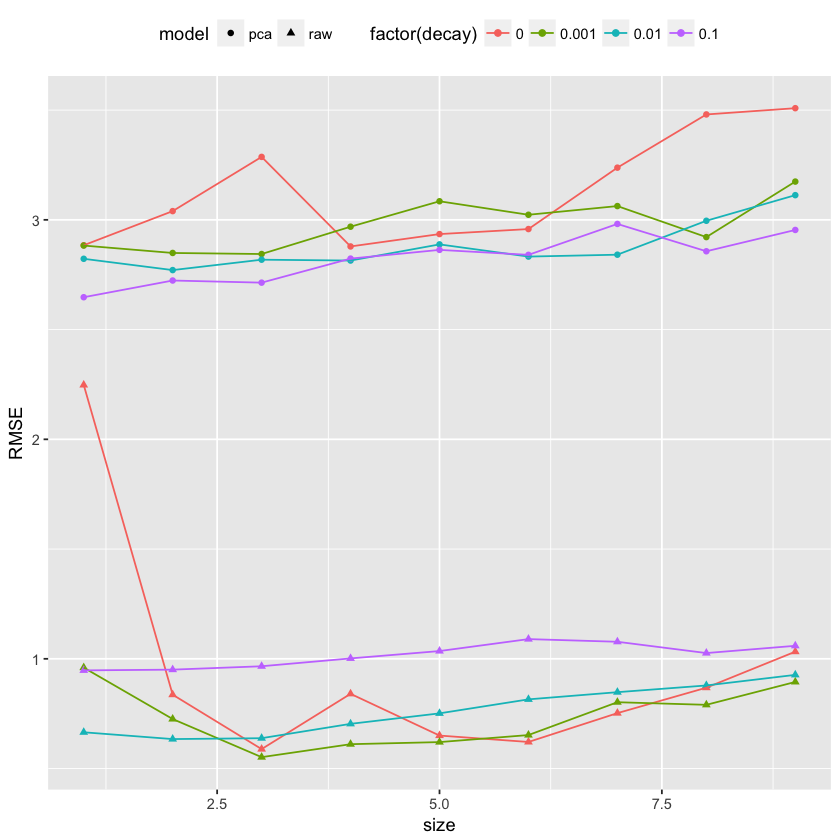

In [20]:
library(ggplot2)

ggplot(plt_net,aes(size,RMSE,colour=factor(decay),shape=model)) +
    geom_point() + geom_line()  + theme(legend.position = "top")